In [39]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv(r"C:\Users\uniqu\Downloads\archive\Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [41]:
print(df.shape)

(2000, 8)


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              2000 non-null   int64 
 1   Gender                  2000 non-null   object
 2   Age                     2000 non-null   int64 
 3   Annual Income ($)       2000 non-null   int64 
 4   Spending Score (1-100)  2000 non-null   int64 
 5   Profession              1965 non-null   object
 6   Work Experience         2000 non-null   int64 
 7   Family Size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


# Preprocessing

In [43]:
df.isnull().sum()

CustomerID                 0
Gender                     0
Age                        0
Annual Income ($)          0
Spending Score (1-100)     0
Profession                35
Work Experience            0
Family Size                0
dtype: int64

In [44]:
df.duplicated().sum()

np.int64(0)

In [45]:
# The data is pretty clean and doesn't have any missing values or duplicates. There is missing data in profession but we can ignore that for now.

# Data Viz

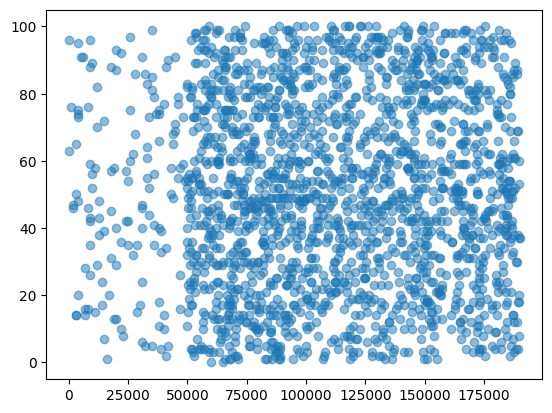

In [46]:
plt.scatter(df['Annual Income ($)'], df['Spending Score (1-100)'], alpha=0.5)
#Previous Purchases

# Modeling

In [47]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [48]:
km 

KMeans(n_clusters=3)

In [50]:
y_predicted = km.fit_predict(df[['Annual Income ($)', 'Spending Score (1-100)']])
y_predicted

array([1, 1, 2, ..., 2, 0, 2], shape=(2000,), dtype=int32)

In [53]:
df["cluster"] = y_predicted
df.head(21)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size,cluster
0,1,Male,19,15000,39,Healthcare,1,4,1
1,2,Male,21,35000,81,Engineer,3,3,1
2,3,Female,20,86000,6,Engineer,1,1,2
3,4,Female,23,59000,77,Lawyer,0,2,1
4,5,Female,31,38000,40,Entertainment,2,6,1
5,6,Female,22,58000,76,Artist,0,2,1
6,7,Female,35,31000,6,Healthcare,1,3,1
7,8,Female,23,84000,94,Healthcare,1,3,2
8,9,Male,64,97000,3,Engineer,0,3,2
9,10,Female,30,98000,72,Artist,1,4,2


C:\Users\uniqu\AppData\Local\Temp\ipykernel_24684\320011274.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


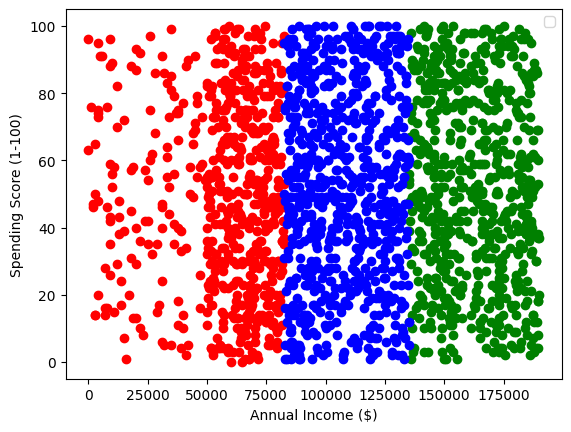

In [56]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1['Annual Income ($)'], df1['Spending Score (1-100)'], color='green')
plt.scatter(df2['Annual Income ($)'], df2['Spending Score (1-100)'], color='red')
plt.scatter(df3['Annual Income ($)'], df3['Spending Score (1-100)'], color='blue')

plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.legend()